# Feature Selection

* As a data scientist, it is crucial to understand the importance of feature selection when buliding a machine learning problem

* It is almost rare that all the variables in the dataset are useful for buildin a model.

* Feature selection looks at different methods one can use to select the best set of features to build optimized models.

## Types
1. Wrapper - Forward feature selection, Backward feature selection
2. Lasso
3. Filter - Pearson, ANOVA, Chi-squared

We will create three classes for each feature selection method

#### Let us import the various libraries we will use

In [1]:
from sklearn.datasets import load_wine, load_breast_cancer, load_diabetes
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn import datasets
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Wrapper Method Class

In [2]:
class Wrapper():

  def __init__(self):
    pass


  def forward_feature_selection(self, X, y, k, num_final_features):
    '''
    This method takes the features part of the dataset X, the output y, the number of k-folds k and the desired number of features,
    num_final_features.
    '''
    self.X = X
    self.y = y
    self.k = k
    self.num_final_features = num_final_features

    # Standardize the features
    scaler = StandardScaler()
    self.X = scaler.fit_transform(self.X)

    # Initialize a list to store the selected feature indices
    selected_features = []

    # Loop until the desired number of final features is reached
    while len(selected_features) < self.num_final_features:
      # Initialize a list to store the accuracy scores for each candidate feature
      candidate_scores = []

      # Loop over all remaining candidate features
      for feature in range(self.X.shape[1]):
        if feature not in selected_features:
            # Create a logistic regression model using the selected features and the candidate feature
            selected_indices = selected_features + [feature]
            X_subset = self.X[:, selected_indices]
            model = LogisticRegression()
            
            # Perform k-fold cross-validation and compute the mean accuracy score
            kf = KFold(n_splits=self.k, shuffle=True, random_state=42)
            scores = cross_val_score(model, X_subset, self.y, cv=kf)
            accuracy = scores.mean()
            
            # Append the accuracy score to the list
            candidate_scores.append(accuracy)

      # Select the candidate feature with the highest accuracy score
      best_feature_index = candidate_scores.index(max(candidate_scores))
    
      # Add the best feature to the list of selected features
      selected_features.append(best_feature_index)
      
      # Print the selected features and their accuracy scores
      print(f"Selected features: {selected_features}")
      print(f"Accuracy scores: {candidate_scores}")

    # Print the final selected feature indices
    print(f"Final selected features: {selected_features}")
    
    return selected_features


  def backward_feature_selection(self, X, y, k, num_final_features):

    '''
    This method takes the features part of the dataset X, the output y, the number of k-folds k and the desired number of features,
    num_final_features.
    '''

    self.X = X
    self.y = y
    self.k = k
    self.num_final_features = num_final_features

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    ''' For backward feature selection, before we start reducing the features, we want to train with the entire set of features and get the accuracy. We do this using k-fold cross validation '''
    # Train a logistic regression model using all features
    model = LogisticRegression()

    # Perform k-fold cross-validation and compute the mean accuracy score
    kf = KFold(n_splits = k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf)
    accuracy_all_features = scores.mean()
    print("Accuracy using all features:", accuracy_all_features)

    '''  We begin the backward_feature algorithm at this point now '''
    # Initialize a list to store the selected feature indices
    selected_features = list(range(X.shape[1]))

    # Loop until the desired number of final features is reached
    while len(selected_features) > num_final_features:
        # Initialize a list to store the accuracy scores for each feature to remove
        remove_scores = []
        
        # Loop over all selected features
        for j in selected_features:
            # Create a copy of the selected features list without the current feature
            remaining_features = [x for x in selected_features if x != j]
            #print(remaining_features)
            
            # Create a logistic regression model using the remaining features
            X_subset = X[:, remaining_features]
            model = LogisticRegression()
            
            # Perform k-fold cross-validation and compute the mean accuracy score
            kf = KFold(n_splits=k, shuffle=True, random_state=42)
            scores = cross_val_score(model, X_subset, y, cv=kf)
            accuracy = scores.mean()
            
            # Append the accuracy score to the list
            remove_scores.append(accuracy)
        
        # Select the feature to remove with the lowest accuracy score
        worst_feature_index = remove_scores.index(min(remove_scores))
        
        # Remove the worst feature from the list of selected features
        selected_features.pop(worst_feature_index)
        
        # Print the selected features and their accuracy scores
        print(f"Selected features: {selected_features}")
        print(f"Accuracy scores: {remove_scores}")

    # Print the final selected feature indices
    print(f"Final selected features: {selected_features}")

    return selected_features
  



#### Testing the methods in the wrapper class

##### Forward Feature Selection

In [3]:
wrapper = Wrapper()

In [4]:
''' Testing the FORWARD feature selection method 
    We use the WINE dataset for this implementation. The WINE dataset has 178 samples, 12 features, and a target feature. The target feature has 3 classes  '''

# Load the WINE dataset
X, y = load_wine(return_X_y=True)

####    CALLING THE "FORWARD FEATURE SELECTION METHOD NOW"     ####
selected_features = wrapper.forward_feature_selection(X, y, k = 5, num_final_features = 4)

# Create a logistic regression model using the final selected features
X_final = X[:, selected_features]

# Standardize the features
scaler = StandardScaler()
X_final = scaler.fit_transform(X_final)

model = LogisticRegression()

# Perform k-fold cross-validation and compute the mean accuracy score
kf = KFold(n_splits=wrapper.k, shuffle=True, random_state=42)
scores = cross_val_score(model, X_final, y, cv=kf)
mean_accuracy = scores.mean()

# Print the mean accuracy score
print(f"Mean accuracy score: {mean_accuracy}")

Selected features: [6]
Accuracy scores: [0.6742857142857143, 0.5165079365079366, 0.4774603174603175, 0.5288888888888889, 0.5055555555555555, 0.6457142857142857, 0.7861904761904762, 0.4996825396825397, 0.5396825396825397, 0.724920634920635, 0.5788888888888889, 0.6287301587301587, 0.6742857142857143]
Selected features: [6, 0]
Accuracy scores: [0.9212698412698412, 0.7582539682539682, 0.8426984126984127, 0.82, 0.7982539682539682, 0.7582539682539682, 0.763968253968254, 0.7917460317460318, 0.8936507936507937, 0.8426984126984127, 0.8206349206349206, 0.8984126984126984]
Selected features: [6, 0, 10]
Accuracy scores: [0.9155555555555555, 0.926984126984127, 0.9268253968253969, 0.9155555555555555, 0.9041269841269841, 0.9155555555555555, 0.9099999999999999, 0.9323809523809523, 0.9380952380952381, 0.915873015873016, 0.9547619047619047]
Selected features: [6, 0, 10, 9]
Accuracy scores: [0.9380952380952381, 0.9325396825396826, 0.9380952380952381, 0.9271428571428573, 0.9380952380952381, 0.932539682539

##### Backward Feature Selection

In [5]:
''' Testing the BACKWARD feature selection method 
   We use the BREAST CANCER dataset for this implementation. The BREAST CANCER dataset has 569 instances or samples, 30 features or attributes and a target feature.  '''

# Load the BREAST dataset
X, y = load_breast_cancer(return_X_y=True)

####    CALLING THE "BACKWARD FEATURE SELECTION METHOD NOW"     ####
selected_features = wrapper.backward_feature_selection(X, y, k = 5, num_final_features = 10)

# Create a logistic regression model using the final selected features
X_final = X[:, selected_features]

# Standardize the features
scaler = StandardScaler()
X_final = scaler.fit_transform(X_final)

model = LogisticRegression()

# Perform k-fold cross-validation and compute the mean accuracy score
kf = KFold(n_splits=wrapper.k, shuffle=True, random_state=42)
scores = cross_val_score(model, X_final, y, cv=kf)
mean_accuracy = scores.mean()

# Print the mean accuracy score
print(f"Mean accuracy score: {mean_accuracy}")

Accuracy using all features: 0.9771464058376029
Selected features: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Accuracy scores: [0.9789007918025152, 0.9736065828287532, 0.9789007918025152, 0.9789007918025152, 0.9771464058376029, 0.9824095637323398, 0.9771464058376029, 0.9806396522279149, 0.9789007918025151, 0.9789007918025152, 0.9771464058376029, 0.9771464058376029, 0.9789007918025151, 0.9771464058376029, 0.9789007918025151, 0.9753920198726906, 0.9789007918025152, 0.9771308802980903, 0.9789007918025151, 0.9771153547585778, 0.9789007918025152, 0.9753920198726906, 0.9789007918025152, 0.9789007918025152, 0.9771308802980905, 0.9771464058376029, 0.9753920198726906, 0.9753920198726906, 0.9788852662630025, 0.982425089271852]
Selected features: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29]
Accuracy scores: [0.9736065828287532, 0.9736065828287532, 0.9736065828287532, 0.97714

## LASSO Method Class

In [6]:
class Lasso_Feature_Selection:

  def __init__(self):
    pass

  def Lasso_method(self, X, y, features, alpha_vals):
    self.alphas = alpha_vals
    self.X = X
    self.y = y
    self.features = features
 
    # Create an empty data frame
    new_df = pd.DataFrame()
    
    # Create a column of feature names
    new_df['Feature Name'] = self.features
    
    # For each alpha value in the list of alpha values,
    for val in self.alphas:
    # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha = val)
        
        # Fit the lasso regression
        lasso.set_params(alpha = val)  # Set the parameters of this estimator
        lasso.fit(X, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % val

        # Create a column of coefficient values
        new_df[column_name] = lasso.coef_
        
    # Return the dataframe    
    return new_df


#### Testing the lasso method in the Lasso_Feature_Selection class

##### LASSO Feature Selection

In [7]:
lasso_meth = Lasso_Feature_Selection()

In [8]:
# Load the diabetes dataset
#diabetes = datasets.load_diabetes()
#diabetes


''' Testing the LASSO feature selection method 
   We use the DIABETES dataset for this implementation.  This is a regression dataset. The DIABETES dataset has 442 instances or samples, 10 features or attributes and a target feature.  '''

# Load the DIABETES dataset
diabetes_data = load_diabetes()
X, y = diabetes_data['data'], diabetes_data['target']


# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

names_of_features = diabetes_data['feature_names']
#print((names_of_features))

alphas = list(np.linspace(0.01, 100, 100))
#print((alphas))

lasso_values = lasso_meth.Lasso_method(X, y, alpha_vals = alphas, features = names_of_features)
lasso_values

<ipython-input-6-cdc9d7f6b808>:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[column_name] = lasso.coef_


,Feature Name,Alpha = 0.010000,Alpha = 1.020000,Alpha = 2.030000,Alpha = 3.040000,Alpha = 4.050000,Alpha = 5.060000,Alpha = 6.070000,Alpha = 7.080000,Alpha = 8.090000,...,Alpha = 90.910000,Alpha = 91.920000,Alpha = 92.930000,Alpha = 93.940000,Alpha = 94.950000,Alpha = 95.960000,Alpha = 96.970000,Alpha = 97.980000,Alpha = 98.990000,Alpha = 100.000000
0,age,-0.453186,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sex,-11.386067,-9.284372,-7.516364,-5.747581,-3.885823,-2.044766,-0.214730,-0.000000,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,bmi,24.736086,24.827142,24.615334,24.404918,24.330640,24.208725,24.069997,23.713848,23.328699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,bp,15.407660,14.070502,13.150059,12.230098,11.297912,10.267848,9.220376,8.560427,7.951940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,s1,-36.052455,-4.796489,-2.652722,-0.509472,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,s2,21.424062,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,s3,4.029853,-10.611404,-10.037271,-9.462334,-8.301892,-6.944399,-5.586015,-4.879667,-4.259963,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
7,s4,8.136614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,s5,35.147572,24.395346,23.109529,21.823858,21.449996,21.213800,20.944923,20.602840,20.251105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,s6,3.213283,2.544679,1.664749,0.784249,0.104968,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


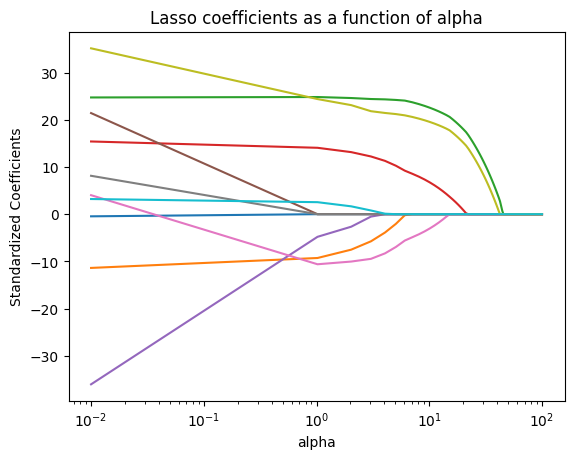

In [9]:
# let us plot the lasso coefficients as a function of the various alpha values
ax = plt.gca()

ax.plot(alphas, lasso_values.to_numpy()[:, 1:].T)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

## Filter Methods Class

In [10]:
class Filter:

  def __init__(self, X, y):
    self.X = X
    self.y = y
  
  def Pearson_method(self):

    correlations = []
    for i in range(self.X.shape[1]):
        correls = np.corrcoef(self.X[:,i],self.y)[0,1]
        correlations.append(correls)
    correlations_array = np.array(correlations)
    return correlations_array

  def rank_features(self):
    features = self.Pearson_method()
    feature_rank = np.argsort(np.abs(features))[::-1]
    return feature_rank

  def compute_anova(self):
    num_samples, num_features = self.X.shape
    f_values, p_values = np.zeros(num_features), np.zeros(num_features)
    for i in range(num_features):
        feature_values = self.X.iloc[:, i].values
        groups = [feature_values[self.y == k] for k in np.unique(self.y)]
        f_values[i], p_values[i] = f_oneway(*groups)
    return f_values, p_values

  def chi_squared(self):
    scores, pvalues = [], []
    for feature in self.X.columns:
      contingency_table = pd.crosstab(self.X[feature], self.y)
      #print(contingency_table)
      
      chi2, p, dof, expected = chi2_contingency(contingency_table)
      scores.append(chi2)
      pvalues.append(p)
      #print(chi2, p, dof, expected)
      #print("====================================")

    return scores, pvalues




  


#### Testing the methods in the Filter class

##### Pearson Feature Selection

In [11]:
''' Testing the Pearson_method feature selection method 
   We use the DIABETES dataset for this implementation.  
   This is a regression dataset. The DIABETES dataset has 
   442 instances or samples, 10 features or attributes and a target feature.  '''


# Load the DIABETES dataset
diabetes_data = load_diabetes()
X, y = diabetes_data['data'], diabetes_data['target']


# # # Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# instantiate the Filter class
filter_pearson = Filter(X,y)

# see how the features are correlated to the target
corr_relation = filter_pearson.Pearson_method()
print(f'Correlation values between each feature and target', corr_relation)

selected_features = filter_pearson.rank_features()[:7]
print(selected_features)


model = LinearRegression()

# Perform k-fold cross-validation and compute the mean accuracy score
kf = KFold(n_splits=5, shuffle = True, random_state=42)
scores = cross_val_score(model, X[:, selected_features], y, cv=kf, scoring = "neg_mean_squared_error")

# Calculate the average MSE value across all K iterations
avg_mse = -np.mean(scores)
print("Average MSE:", avg_mse)


Correlation values between each feature and target [ 0.18788875  0.043062    0.58645013  0.44148176  0.21202248  0.17405359
 -0.39478925  0.43045288  0.56588259  0.38248348]
[2 8 3 7 6 9 4]
Average MSE: 3117.779096347468


##### ANOVA Feature Selection

In [12]:
''' Testing the ANOVA feature selection method 
   We use the BREAST CANCER dataset for this implementation. 
   This is a classification dataset.
   The BREAST CANCER dataset has 569 instances or samples, 
   30 features or attributes and a target feature.  '''


# Load the BREAST CANCER dataset
X, y = load_breast_cancer(return_X_y=True, as_frame= True)

# instantiate the Filter class
filter_anova = Filter(X,y)

f_values, p_values = filter_anova.compute_anova()

# let us look at each feature and the corresponding f-value and p-value
features_pval_and_fval = pd.DataFrame({'feature': X.columns, 'F-value': f_values, 'p-value': p_values})
#features_pval_and_fval

In [13]:

# now let us sort the features_pvalues_fvalues dataframe based on the 
# p-value in ascending order
sorted_features_pval_and_fval = features_pval_and_fval.sort_values(by=['p-value'])
#sorted_features_pval_and_fval

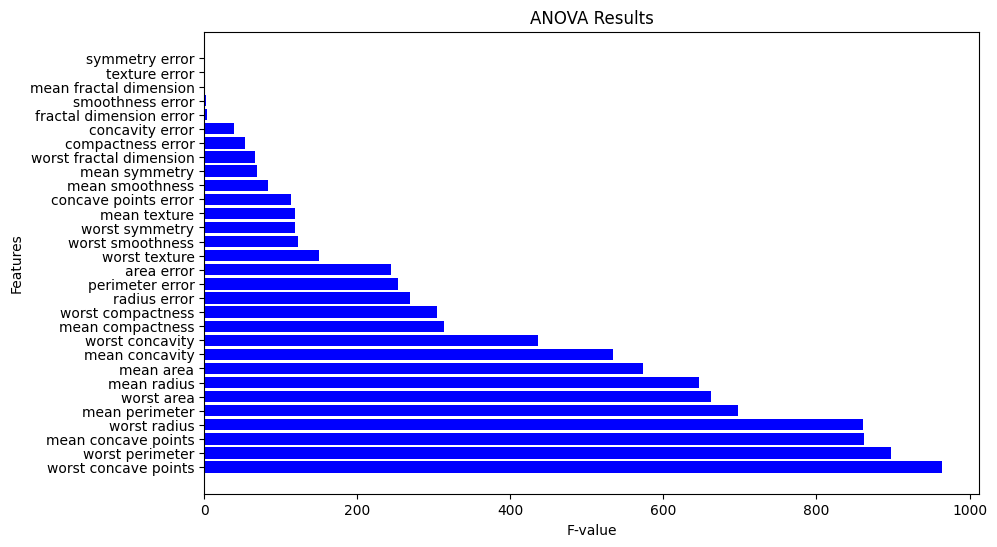

In [14]:
# plot F-values for each feature
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(sorted_features_pval_and_fval['feature'], sorted_features_pval_and_fval['F-value'], color='blue')
ax.set_xlabel('F-value')
ax.set_ylabel('Features')
ax.set_title('ANOVA Results')
plt.show()

In [15]:
# select top k features with the lowest p-values
k = 10
selected_features = sorted_features_pval_and_fval['feature'].iloc[:k].tolist()
selected_X = X[selected_features]

# # # Standardize the features
scaler = StandardScaler()
std_selected_X = scaler.fit_transform(selected_X)
std_selected_X.shape

(569, 10)

In [16]:
# let us train and test our model using k-fold cross validation
model = LogisticRegression()

# Perform k-fold cross-validation and compute the mean accuracy score
kf = KFold(n_splits=5, shuffle = True, random_state=42)
scores = cross_val_score(model, std_selected_X, y, cv=kf)

# Calculate the average accuracy across all K iterations
avg_accuracy = np.mean(scores)
print("Average Accuracy:", avg_accuracy)

Average Accuracy: 0.9577860580655179


##### Chi Squared Feature Selection

In [18]:
''' Testing the CHI SQUARED feature selection method 
   We use only the categorical features from the TITANIC dataset for this implementation. 
   The TITANIC dataset has 891 instances or samples, 
   The categorical features are 'sex', 'embarked', 'who', 'embark_town', 'alive'
'''

# Load the TITANIC dataset
data = sns.load_dataset('titanic')

# extracting the categorical features
new_data = data[data.select_dtypes(['object']).columns]

# Split data into features and target, the features are 'sex', 'embarked', 'who', 'embark_town'
# and the target is 'alive'
X = new_data.iloc[:, :-1]
y = new_data.iloc[:, -1]

# apply the chi_squared_method and extract the scores and the p_values
filter_chi = Filter(X,y)
scores, p_values = filter_chi.chi_squared()
print(scores)



[260.71702016732104, 26.48914983923762, 283.923050324233, 26.48914983923762]


In [19]:
# number of desired features
k = 2

#the indices of top k number of desired features
top_k_indices = np.argsort(scores)[::-1][0:k]

#now we select those features
selected_features = np.array(X.columns)[top_k_indices]
print("Selected features:", selected_features)

Selected features: ['who' 'sex']
